In this notebook, I will answer this question : 

How each neighborhood in Boston performing in terms of ratings?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
listing = pd.read_csv('data/listings.csv')

In [3]:
new_listing_df = listing.dropna(subset=['review_scores_rating'])

In [4]:
len(new_listing_df)

2772

~2772 datasets with rating, seems reasonable to analyze

In [5]:
new_listing_df['price'] =  [np.nan if str(x) == 'nan' else float(str(x).replace('$','').replace(',','')) for x in new_listing_df.price]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


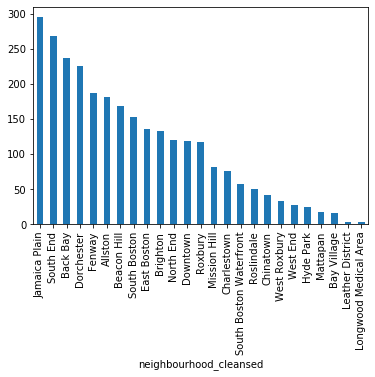

In [6]:
new_listing_df.groupby(['neighbourhood_cleansed']).id.count().sort_values(ascending=False).plot(kind='bar')

In terms of number listing per neighborhood, clearly there are neighborhood with low number of listings.

So for my ratings analysis, I will consider the neighborhood with number of listing more than 50 to get a good quality data.

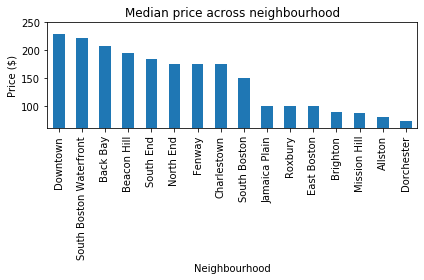

In [7]:
plt.figure()
new_listing_df.groupby(['neighbourhood_cleansed']).filter(lambda x: x['id'].count() > 50).groupby(['neighbourhood_cleansed']).price.median().sort_values(ascending=False).plot(kind='bar', ylim=(60,250), title='Median price across neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig('Median price across neighbourhood',quality=100, optimize=True)



Donwtown and South Boston Waterfront has high median price as they are in prime location 

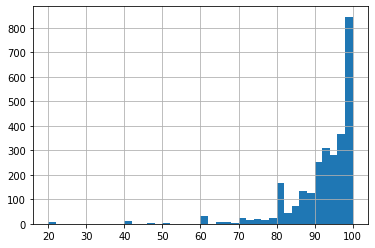

In [8]:
new_listing_df.review_scores_rating.hist(bins=40)

the distribution is skewed to the left which means most of the listing has high rating

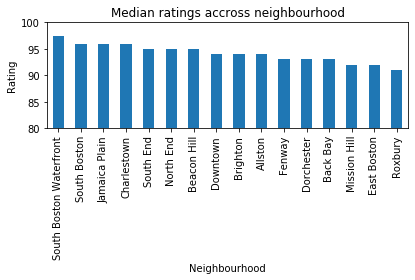

In [9]:
plt.figure()
new_listing_df.groupby(['neighbourhood_cleansed']).filter(lambda x: x['id'].count() > 50).groupby(['neighbourhood_cleansed']).review_scores_rating.median().sort_values(ascending=False).plot(kind='bar', ylim=(80,100), title='Median ratings accross neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('Median ratings across neighbourhood')



All the neighbourhood is having >90 ratings and the median ratings is similar across neighbourhood. 

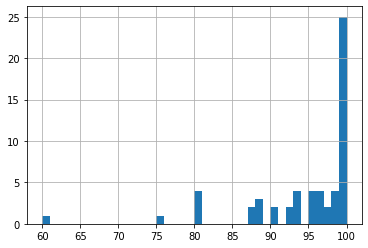

In [10]:
new_listing_df[new_listing_df.neighbourhood_cleansed=='South Boston Waterfront'].review_scores_rating.hist(bins=40)

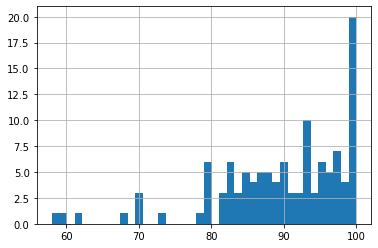

In [11]:
new_listing_df[new_listing_df.neighbourhood_cleansed=='Roxbury'].review_scores_rating.hist(bins=40)

The overall rating distribution also reflect in the individual neighbourhood distribution. It is left skewed distribution.

In conclusion, all neighbourhood perform very well in terms of ratings. It is left skewed distribution with majority of the ratings is > 90